In [ ]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2022-10-06 18:27:01--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2022-10-06 18:27:01--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2c3301c0647e7c920689b28913.dl.dropboxusercontent.com/cd/0/inline/BuWk9h2W_28bLjxh9nXGx6789XVRumYw9DG55h4TstnrGl_tmLPAp3bbxkfZX8y4mzuLhLLyvSJE_WZ_VLCRVrgFT_CXdx1qWJDxtDqlB-_sU9u446xuqN3RVeoyl90qpoe-qTIhLY8qDn7nuriV6TuDYWMTo1pPQRcGp9iBP4AbHw/file# [following]
--2022-10-06 18:27:01--  https://uc2c3301c0647e7c920689b28913.dl.dropboxusercontent.com/cd/0/inline/BuWk9h2W_28bLjxh9nXGx6789XVRumYw9DG55h4TstnrGl_tmLPAp3bbxkfZX8y4mzuLhLLyvSJE_W

In [ ]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [ ]:
#Building our Model To train the data

In [ ]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [ ]:
#Preparing our data using data generator

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


In [ ]:
#visualizaing the data that is fed to train data gen

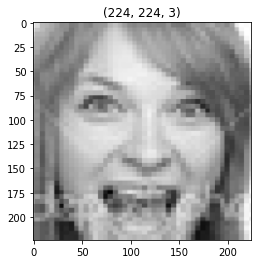

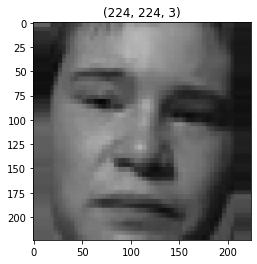

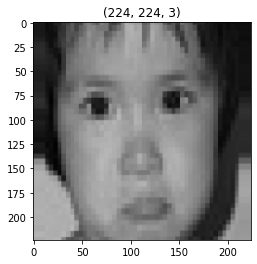

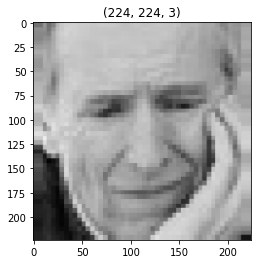

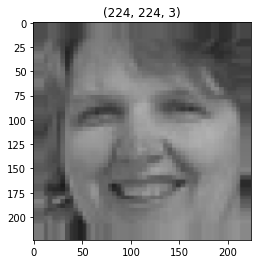

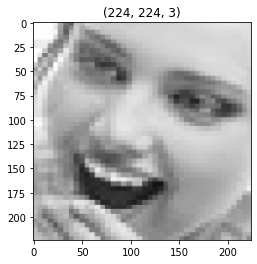

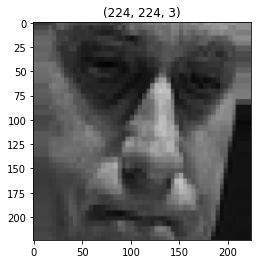

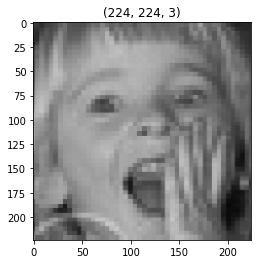

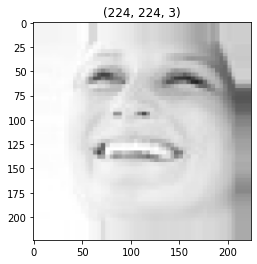

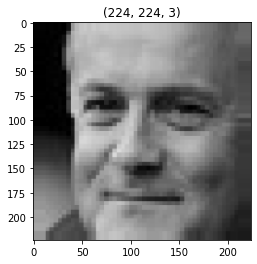

In [ ]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will plot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [ ]:
#having early stopping and model check point

In [ ]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [ ]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 15.3327 - accuracy: 0.2438
Epoch 1: val_accuracy improved from -inf to 0.25781, saving model to best_model.h5
10/10 [==============================] - 25s 2s/step - loss: 15.3327 - accuracy: 0.2438 - val_loss: 8.0738 - val_accuracy: 0.2578
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 9.8779 - accuracy: 0.3125 
Epoch 2: val_accuracy improved from 0.25781 to 0.38281, saving model to best_model.h5
10/10 [==============================] - 20s 2s/step - loss: 9.8779 - accuracy: 0.3125 - val_loss: 9.0977 - val_accuracy: 0.3828
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 8.7261 - accuracy: 0.3187
Epoch 3: val_accuracy improved from 0.38281 to 0.40234, saving model to best_model.h5
10/10 [==============================] - 20s 2s/step - loss: 8.7261 - accuracy: 0.3187 - val_loss: 8.9306 - val_accuracy: 0.4023
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 6.988

In [ ]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

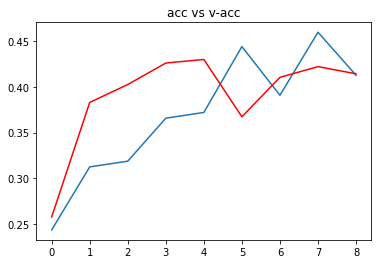

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

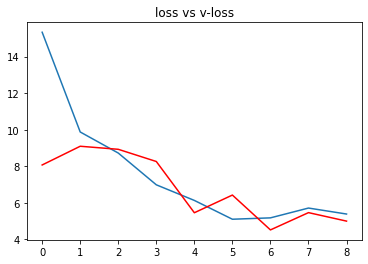

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

 the image is of sad


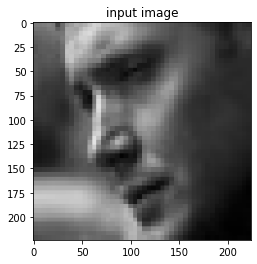

In [ ]:
# path for the image to see if it predics correct class

path = "/content/test/angry/PrivateTest_1054527.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


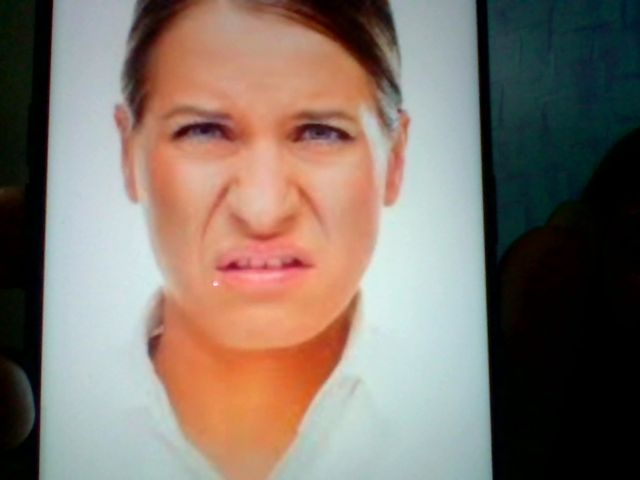

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

 the image is of sad


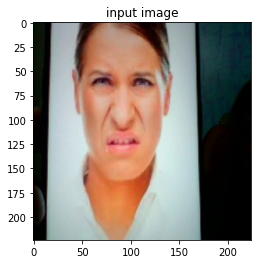

In [ ]:
# path for the image to see if it predics correct class

path = "/content/photo.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()